## Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Definición del problema

Crear un algoritmo de regresión para predecir el nuevo tiempo record en categoria de 100 metros.

Year representa los años

Time el tiempo del recorrdo de 100 metros

In [2]:
df=pd.read_csv("C:\\Users\\amado\\Desktop\\Blog\\Base de datos\\olympic100m.csv")

In [3]:
df.head()

,year,time
0,1896,12.0
1,1900,11.0
2,1904,11.0
3,1906,11.2
4,1908,10.8


In [4]:
df.shape

(29, 2)

El dataset cuenta cons 29 observaciones y 2 variables.

In [5]:
df.describe()

,year,time
count,29.000000,29.000000
mean,1956.620690,10.343448
std,37.876127,0.537509
min,1896.000000,9.630000
25%,1924.000000,9.950000
50%,1960.000000,10.250000
75%,1988.000000,10.800000
max,2016.000000,12.000000


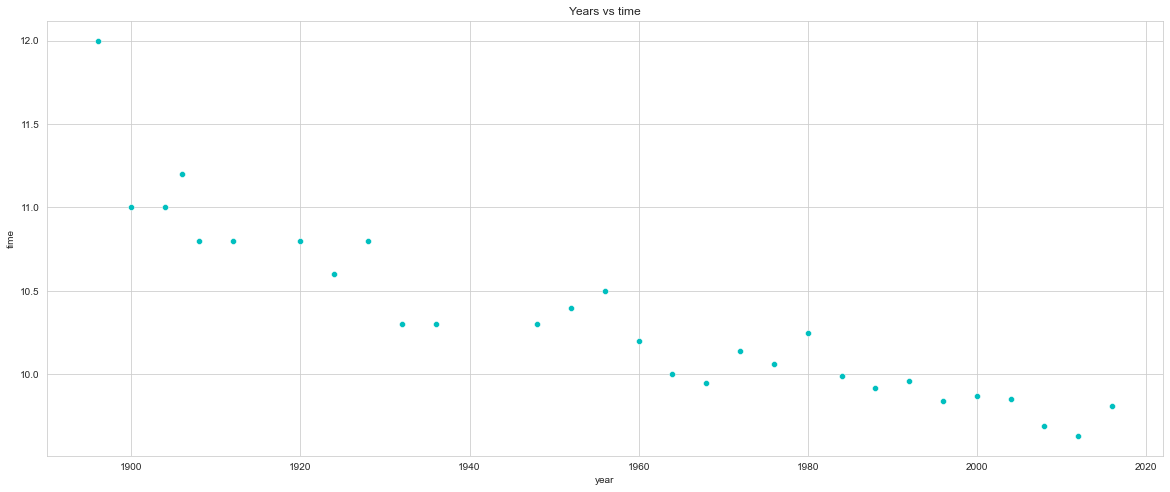

In [6]:
sns.set_style(style='whitegrid')


plt.subplots(1,1,figsize=(20,8))

plt.title('Years vs time')
sns.scatterplot(x='year',y='time',data=df,color='c')
plt.show()

Se ve una clara correlación negativa ya que entre más pasa los años lo más natural es que vaya disminuyendo el tiempo de recorrido ya que cada vez surgen mejores formas de entrenamiento y más investigación cientifíca en el deporte a su vez se aprecía un valor atípico por lo cual tenemos que eliminarlo para evitar el sesgo.

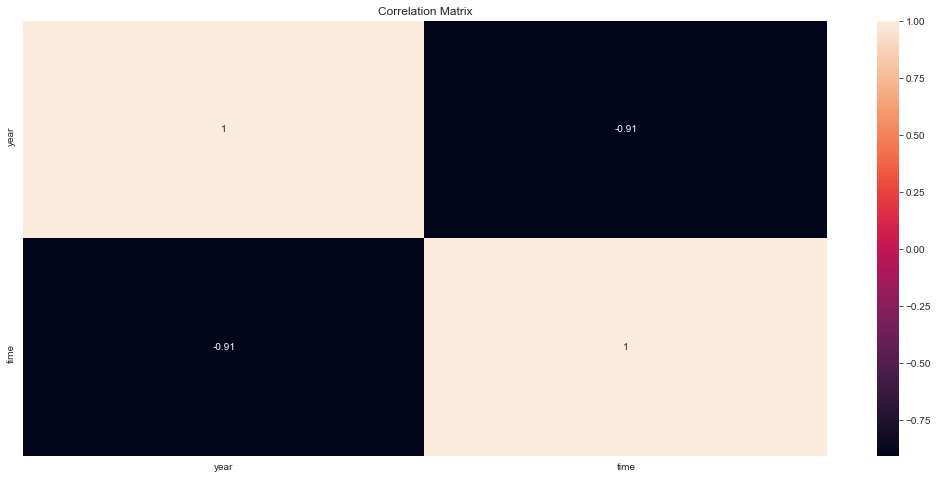

In [7]:
plt.subplots(1,1,figsize=(18,8))

plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)
plt.show()

Como deduciamos que hay una alta correlacción negativa entre ambas variables.

In [8]:
df=df[df['time']<max(df['time'])]

Eliminamos los valores atípicos.

### Preprocesamiento de datos

In [9]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

Es buena práctica estandarizar los datos para evitar valores con mucha diferencia.

### Definimos las variables independiete y dependiente

In [10]:
X=np.array(df['year']).reshape(-1,1)
X=sc.fit_transform(X)


y=df['time']

In [11]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X,y)

LinearRegression()

### Métricas de desempeño

In [12]:
from sklearn.metrics import mean_squared_error

y_pred=lm.predict(X)
print(f'R2 score: {lm.score(X,y)}')
print(f'MSE score: {mean_squared_error(y,y_pred)}')

R2 score: 0.8963951502071188
MSE score: 0.019416606043530765


Podemos observar alto R2 ajustado lo cual indica que las predicciones son muy cercanas a los datos originales y el 
MSE es un estimador que  mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. 

In [13]:
df['predicciones']=y_pred

In [14]:
def main():
    

    plt.title('Valores reales vs predichos')
   
    plt.scatter(X,y,c='#EA3E14',lw=2,label='Valores reales')
    plt.plot(X,y_pred,c='#1CEA14',label='Valores predichos')

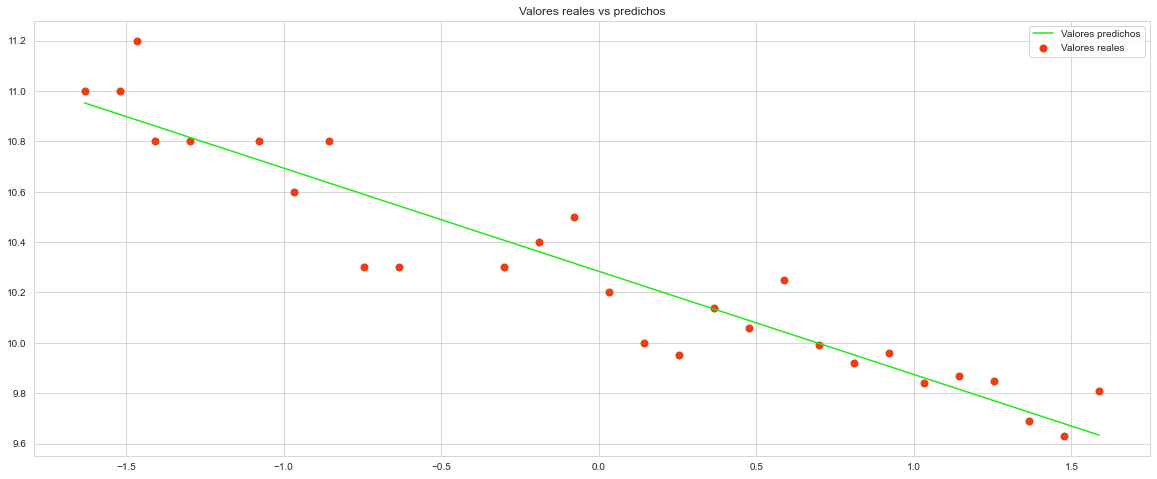

In [15]:
if __name__ =='__main__':
    
    plt.subplots(1,1,figsize=(20,8))
    main()
    plt.legend()

In [131]:
df

,year,time,predicciones
1,1900,11.00,10.952890
2,1904,11.00,10.907395
3,1906,11.20,10.884648
4,1908,10.80,10.861901
5,1912,10.80,10.816407
6,1920,10.80,10.725418
7,1924,10.60,10.679924
8,1928,10.80,10.634430
9,1932,10.30,10.588935
10,1936,10.30,10.543441


### Guardamos el modelo

In [132]:
import joblib as job

job.dump(lm,'lm_100m.pkl')

['lm_100m.pkl']